# **Text Classification Using Keras (Tensorflow)**

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


This task will be performed using IMDB dataset. The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews (sequences of words) have been converted to sequences of integers, where each integer represents a specific word in a dictionary.

In [4]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. The rare words are discarded to keep the size of the data manageable.

## **Explore the data**

In [5]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
len(train_data[0]), len(train_data[1])

(218, 189)

##**Convert the integers back to words**

In [0]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [9]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## **Data Preparation**

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [11]:
len(train_data[0]), len(train_data[1])

(256, 256)

## **Create a model**

In [12]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
np.random.seed(10)
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Cross validation dataset
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## **Train the model**

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 165us/step - loss: 0.6918 - acc: 0.5143 - val_loss: 0.6899 - val_acc: 0.5356
Epoch 2/40
15000/15000 [==============================] - 0s 26us/step - loss: 0.6859 - acc: 0.5980 - val_loss: 0.6821 - val_acc: 0.6578
Epoch 3/40
15000/15000 [==============================] - 0s 26us/step - loss: 0.6732 - acc: 0.6849 - val_loss: 0.6663 - val_acc: 0.7045
Epoch 4/40
15000/15000 [==============================] - 0s 26us/step - loss: 0.6506 - acc: 0.7460 - val_loss: 0.6413 - val_acc: 0.7291
Epoch 5/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.6176 - acc: 0.7786 - val_loss: 0.6065 - val_acc: 0.7799
Epoch 6/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.5763 - acc: 0.8093 - val_loss: 0.5664 - val_acc: 0.8091
Epoch 7/40
15000/15000 [==============================] - 0s 29us/step - loss: 0.5301 - acc: 0.8339 - val_loss: 0.5241 - val_ac

## ** Evaluate the model**

In [17]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 2s 61us/step
[0.32761571838378906, 0.87216]


**Create a graph of accuracy and loss over time**

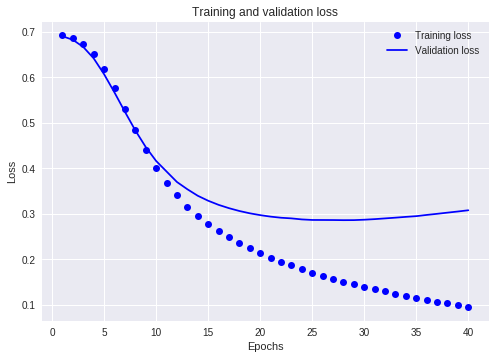

In [19]:
history_dict = history.history
history_dict.keys()
#dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Overfitting case to avoid this use call back

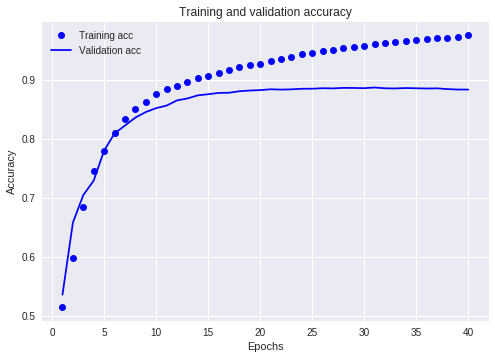

In [20]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.0795 - acc: 0.9793 - val_loss: 0.3283 - val_acc: 0.8801
Epoch 2/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.0759 - acc: 0.9811 - val_loss: 0.3334 - val_acc: 0.8808
Epoch 3/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.0722 - acc: 0.9817 - val_loss: 0.3386 - val_acc: 0.8802
Epoch 4/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.0690 - acc: 0.9823 - val_loss: 0.3445 - val_acc: 0.8789
Epoch 5/40
15000/15000 [==============================] - 0s 27us/step - loss: 0.0660 - acc: 0.9842 - val_loss: 0.3502 - val_acc: 0.8784
Epoch 6/40
15000/15000 [==============================] - 0s 28us/step - loss: 0.0632 - acc: 0.9851 - val_loss: 0.3556 - val_acc: 0.8782
Epoch 7/40
15000/15000 [==============================] - 0s 29us/step - loss: 0.0602 - acc: 0.9861 - val_loss: 0.3620 - val_acc

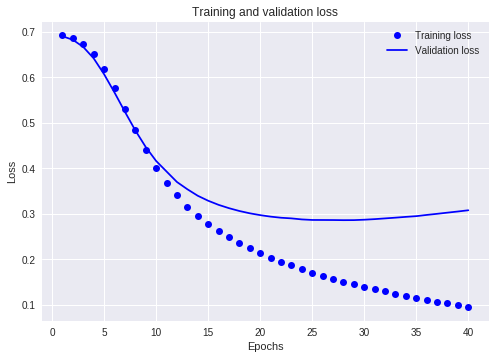

In [22]:
callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

history1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1, callbacks = callbacks)
history_dict = history1.history
history_dict.keys()
#dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history1.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# After epoch 10, v'val_loss' is almost not changing

In [23]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 2s 61us/step
[0.41572355195999144, 0.86384]
